In [ ]:
from ultralytics import YOLO
import cv2
from IPython.display import Image, display
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip dataset
!unzip "/content/drive/MyDrive/Bike_Helmet_Detection_System.zip" -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/labels/Without_Helmet-241-_jpg.rf.9315374b88ed85bdfac9cdc034372c8a.txt  
 extracting: /content/dataset/train/labels/Without_Helmet-242-_jpg.rf.43b47b2a840a0d4d867b0871d5347e35.txt  
  inflating: /content/dataset/train/labels/Without_Helmet-242-_jpg.rf.b97778198a5a8fdee6de3f231f3df53a.txt  
  inflating: /content/dataset/train/labels/Without_Helmet-244-_jpg.rf.1cedf0b06c37f4675e59d0d84f6eadd9.txt  
  inflating: /content/dataset/train/labels/Without_Helmet-244-_jpg.rf.c96c14450b86bab2778f58378d29de34.txt  
 extracting: /content/dataset/train/labels/Without_Helmet-245-_jpg.rf.7a508e93b234afa9c41c00c5905127ce.txt  
  inflating: /content/dataset/train/labels/Without_Helmet-245-_jpg.rf.c5868d85d723645071270bd2c891934d.txt  
  inflating: /content/dataset/train/labels/Without_Helmet-246-_jpg.rf.9f158157dc3ed45fd84183cb58120f3e.txt  
  inflating: /content/dataset/train/labels/Without_Helmet-246-_jpg.rf.d0e1e5d

In [ ]:
# Create data.yaml configuration
data_yaml = """
path: /content/dataset  # dataset root dir
train: train/images  # train images
val: valid/images  # validation images
test: test/images  # test images

# Classes
names:
  0: with_helmet
  1: without_helmet
"""

with open('/content/dataset/data.yaml', 'w') as f:
    f.write(data_yaml)

In [ ]:
import os
import yaml

# Load yaml
with open('/content/dataset/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

print("Dataset configuration:")
print(data)

# Check number of images
train_images = len(os.listdir('/content/dataset/train/images'))
val_images = len(os.listdir('/content/dataset/valid/images'))

print(f"\nTraining images: {train_images}")
print(f"Validation images: {val_images}")

Dataset configuration:
{'path': '/content/dataset', 'train': 'train/images', 'val': 'valid/images', 'test': 'test/images', 'names': {0: 'with_helmet', 1: 'without_helmet'}}

Training images: 7308
Validation images: 462


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

# Train the model
results = model.train(
    data='/content/dataset/data.yaml',
    epochs=100,  # Increase to 100 for better accuracy
    imgsz=640,
    batch=16,
    name='Bike_Helmet_Detection_System',
    patience=20,
    save=True,
    project='/content/drive/MyDrive/runs/detect'
)

Ultralytics 8.3.247 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Bike_Helmet_Detection_System, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.


image 1/1 /content/image10342.jpg: 640x480 1 with_helmet, 12.8ms
Speed: 2.3ms preprocess, 12.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict8


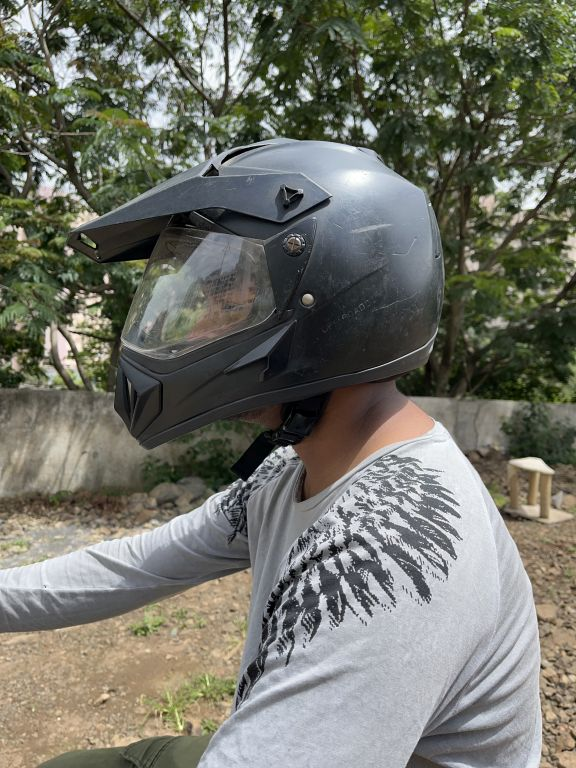

In [ ]:
# Load trained model
model = YOLO('/content/drive/MyDrive/runs/detect/Bike_Helmet_Detection_System/weights/best.pt')

# Test on a single image
results = model.predict(
    source='/content/image10342.jpg',
    save=True,
    conf=0.5  # Confidence threshold
)

# Display result
Image(filename='/content/image10342.jpg', width=600)


In [ ]:
# Testing on Multiple images
results = model.predict(
    source='/content/dataset/test/images',
    save=True,
    conf=0.5,
    project='/content/drive/MyDrive/Helmet_Detection_Project/test'
)
import glob
from IPython.display import Image, display

test_images = glob.glob('/content/test_results/predict/*.jpg')[:5]
for img in test_images:
    display(Image(filename=img, width=500))


image 1/254 /content/dataset/test/images/0-280774-3-392-1-102231221756_jpg.rf.a419c557e8f2283035eac0b01053c0b7.jpg: 640x640 1 without_helmet, 19.4ms
image 2/254 /content/dataset/test/images/002_cross-helmet-x1_jpg.rf.d3dc104cd9b85fc51c61b8f821ba97a7.jpg: 640x640 1 with_helmet, 16.3ms
image 3/254 /content/dataset/test/images/12_jpg.rf.ade02de073a6b576fe9cbf9e31a4f486.jpg: 640x640 1 without_helmet, 16.3ms
image 4/254 /content/dataset/test/images/14_jpg.rf.2b6282956b847aa040b2ede4dde9ab7d.jpg: 640x640 3 without_helmets, 16.3ms
image 5/254 /content/dataset/test/images/158_jpg.rf.6dfc8941e74b4e538be27f0525583385.jpg: 640x640 1 without_helmet, 16.3ms
image 6/254 /content/dataset/test/images/1639830539778-ae5w6_png_jpg.rf.4cc7a871200d5e6eacbedd07d179c505.jpg: 640x640 1 with_helmet, 15.6ms
image 7/254 /content/dataset/test/images/1652357227940_35_11zon_jpg.rf.8cd2d4da1fe51fde59c674f33a94c5d6.jpg: 640x640 1 with_helmet, 15.6ms
image 8/254 /content/dataset/test/images/20-3-_png_jpg.rf.50799f9e4